# Dimensionality Reduction

##### The Curse of Dimensionality

-picking a random point in a 1x1 square gives a .4% of being located <.001 from the border

-picking a random point in a 10,000 dimension unit hypercube gives nearly 100% chance of being <.001 from any border

The idea is that more dimensions = more space = more outliers = less closeness between data

Models based on similarity (k-nn) or poor scalers (SVMs, dense NN) fall apart on big data.

## Main Approaches for Dimensionality Reduction

### Projection

Irl, training instances not evenly spread across all dimension, they usually lie in a subset of the hypercube

Can project, ie 3d data onto a 2d plane. Orthogonal projection (from linalg)

### Manifold Learning

"Swiss roll" data - data that looks rolled up in 3d. You cant just project onto any plane because thatll squish each layer on top of each other.

A 2d manifold is a 2d shape that can be bent/twisted in higher d space. For any manifold dimension, a manifold is a n dimensional "object" that resembles a d (d<n) hyperplane

Manifold learning models the manifolds the data lies on. Manifold assumption: most real world high dimensional data lie close to a lower dimensional manifold. Tends to hold in real life.

Think about MNIST data: a digit looks very different from a randomly generated image. You have less degrees of freedom to make a digit than you do to make random noise. 

The manifold assumption also assumes that your task (classification/regression) will be easier in lower dimensions.

Dimensionality reduction speeds up training, but might not make an easier solution. Its best used when there arent a lot of instances relative to features.

## PCA (Principal Component Analysis)

Identify hyperplane closest to data, then project data onto it.

### Preserving the Variance
Need to pick the subspace that keeps the maximum amount of variance in the data. This is done by picking the axis that minimizes the mean squared dataset and the projection onto that axis (linear regression is back).

### Principal Components
PCA starts by picking the axis that accounts for the most variance. In 2d, this is the linear regression. It also finds the orthogonal axis that accounts for the most amount of variance left -> in 2d, only one option. Keeps going, getting n axes for n dimensions.

Axis i is the i'th principal component. After projection, the first PC corresponds to z<sub>1</sub> axis, 2nd to z2, and so on. NOTE:

How to get PC's? SVD: Singular Value Decomposition

Turns $X$ into 3 matrices $U\Sigma V^T$

V has all the unit vectors you need, in columns, in the correct order.

In [1]:
import numpy as np
X = np.array([[[1,2,3],[5,2,1],[2,3,1]],[[4,3,2],[4,7,7],[7,8,9]]]).reshape(2, 9) # some random data
Xcentered = X - X.mean(axis=0)
U, s , Vt = np.linalg.svd(Xcentered)
c1 = Vt[0]
c2 = Vt[1]
c1
# PCA ASSUMES DATA IS CENTERED! sklearn does this for u

array([-0.21938173, -0.07312724,  0.07312724,  0.07312724, -0.36563621,
       -0.43876345, -0.36563621, -0.36563621, -0.58501794])

### Projecting Down to d Dimensions

To project down and get X<sub>d-proj</sub> , do matrix multiplication $XW_d$, where Wd is the matrix containing first d columns of V from SVD


In [2]:
W2 = Vt[:2].T
X2D = Xcentered @ W2
X2D

array([[ 6.83739717e+00,  1.38777878e-16],
       [-6.83739717e+00, -1.38777878e-16]])

### In Sklearn

In [3]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit_transform(X)

# after fitting, the .components_ attribute holds transpose of Wd, one row per PC

array([[ 6.83739717e+00,  3.43500142e-16],
       [-6.83739717e+00,  3.43500142e-16]])

### Explained Variance Ratio
The ratio tells you what proportion of the datasets variance lies along each PC:

In [4]:
pca.explained_variance_ratio_
# My data sucked, so its all on one axis

array([1.00000000e+00, 2.52390048e-33])

### Choosing the right number of Dimensions

Usually you should start by saying you want to keep 95% of the variance, and find the smallest number of dimensions that can do that.

In [5]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml("mnist_784", as_frame=False)
Xtrain, ytrain = mnist.data[:60000], mnist.target[:60000]
Xtest, ytest = mnist.data[60000:], mnist.target[60000:]

pca = PCA()
pca.fit(Xtrain)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum>=.95)+1
d

154

In [6]:
# You could do this again and set n_components=d manually, or
pca = PCA(n_components=.95)
Xreduced = pca.fit_transform(Xtrain)

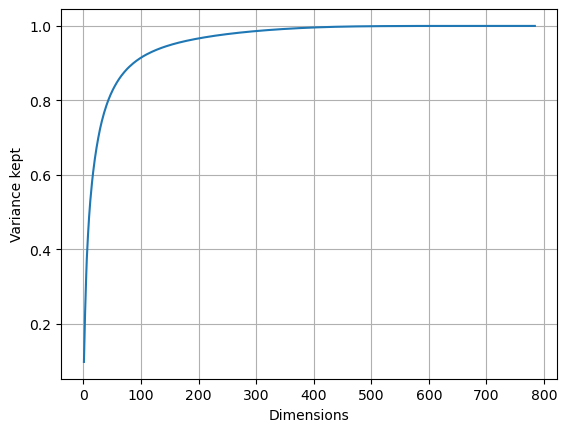

In [7]:
x = np.linspace(1,len(cumsum), len(cumsum))
import matplotlib.pyplot as plt

plt.plot(x, cumsum)
plt.xlabel("Dimensions")
plt.ylabel("Variance kept")
plt.grid()
plt.show()

In [8]:
# Tuning dimensionality reduction for classification

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import make_pipeline

clf = make_pipeline(PCA(random_state=42), RandomForestClassifier(random_state=42))
params = {
    "pca__n_components": np.arange(10,80),
    "randomforestclassifier__n_estimators": np.arange(50,500)
}
rndSearch = RandomizedSearchCV(clf, params, n_iter=10, cv=3, n_jobs=-1)
rndSearch.fit(Xtrain[:1000], ytrain[:1000])

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('pca', PCA(random_state=42)),
                                             ('randomforestclassifier',
                                              RandomForestClassifier(random_state=42))]),
                   n_jobs=-1,
                   param_distributions={'pca__n_components': array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
       27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43,
       44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57,...
       401, 402, 403, 404, 405, 406, 407, 408, 409, 410, 411, 412, 413,
       414, 415, 416, 417, 418, 419, 420, 421, 422, 423, 424, 425, 426,
       427, 428, 429, 430, 431, 432, 433, 434, 435, 436, 437, 438, 439,
       440, 441, 442, 443, 444, 445, 446, 447, 448, 449, 450, 451, 452,
       453, 454, 455, 456, 457, 458, 459, 460, 461, 462, 463, 464, 465,
       466, 467, 468, 469, 470, 471, 472, 473, 474, 475, 476, 477, 478,
       479, 480, 481, 482, 483, 484, 485, 486, 487, 488, 489, 490, 491,
       492, 493, 494, 495, 496, 497, 498, 499])})

In [9]:
rndSearch.best_params_
# 784 dimensions to 40-60 (changes as you rerun this)

{'randomforestclassifier__n_estimators': 488, 'pca__n_components': 22}

### PCA for Compression

If you keep 95% variance for MNIST, you get 154 features, so about 20% of original 784 feature size

You can also go back from d to n dimensions, not perfectly, but within the % of lost variance. The MSE between real and reconstructed is called *reconstruction error*

$$ X_{recovered} = X_{d-proj} W_d^T

In [10]:
Xreconstructed = pca.inverse_transform(Xreduced)

### Randomized PCA

randomized PCA is a stochastic algorithm that finds an approximation for d PC's

randomized is $O(m * d^2)+O(d^3)$ vs SVD $O(m*n^2)+O(n^3)$

as long as d<<n randomized is way faster

In [11]:
rndPca = PCA(n_components=154, svd_solver="randomized")
Xreduced = rndPca.fit_transform(Xtrain)

### Incremental PCA

Some data is too large to feed it all into PCA at once, so incremental pca lets you do parts at a time. Good for online learning.

In [12]:
from sklearn.decomposition import IncrementalPCA
nBatches = 100
incPca = IncrementalPCA(n_components=154)
for batch in np.array_split(Xtrain, nBatches):
    incPca.partial_fit(batch)

Xreduced = incPca.transform(Xtrain)
# this is slow because of python loops probably

In [13]:
# NumPy memmap method to manipulate disk data as if it was in memory
# filename = "mnist.mmap"
# Xmmap = np.memmap(filename, dtype="float32", mode="write", shape=Xtrain.shape)
# Xmmap[:] = Xtrain
# Xmmap.flush()

# Xmmap = np.memmap(filename, dtype="float32", mode="readonly").reshape(-1,784)
# batchSize = Xmmap.shape[0]
# incPca = IncrementalPCA(n_components=154, batch_size=batchSize)
# incPca.fit(Xmmap)

# You need to specify the shape, because data is stored shapeless

## Random Projection

For large images, pca can be too slow. It turns out that random projections actually can keep distances pretty well.

For ex: 5000 instances (m) with 20k features (n) each, and you dont want distances to change by more than e=10%, project to d where $ d >= 4log(m) / ([1/2]e^2 - [1/3]e^3) $

d turns out to be 7300. So basically you can randomly project, lose 13k columns, and the data will stay pretty normal.

In [14]:
from sklearn.random_projection import johnson_lindenstrauss_min_dim
m,e = 5000, .1
d = johnson_lindenstrauss_min_dim(m,eps=e)
d

7300

In [15]:
# Now you can generate a random matrix P of shape [d,n], with dxn random normal vals with mean 0, variance 1/d
n = 20000
rng = np.random.default_rng(seed=42)
P = rng.standard_normal((d,n)) / np.sqrt(d)

X = rng.standard_normal((m,n))
Xreduced = X @ P.T

In [16]:
# The Sklearn implementation
from sklearn.random_projection import GaussianRandomProjection
gaussianProj = GaussianRandomProjection(eps=e, random_state=42)
Xreduced = gaussianProj.fit_transform(X)

# can fine tune EPS and n_components w/ ross val

In [17]:
# SparseRandomProjection
# Does the same thing, but the random matrix is sparse -> uses 25 mb instead of 1.2 gb for the last example
# Its also faster, so usually sparse >>> gaussian projection
# Ratio r of nonzero items is called density. By default, density = 1 / (root n) (for 20k, 1/141)
# Each cell in sparse matrix has probability r of being nonzero, and each nonzero value is v or -v, v= 1 / (root d*r)

In [18]:
# inverse transform -> may take awhile
# componentsPinv = np.linalg.pinv(gaussianProj.components_)
# Xrecovered = Xreduced @ componentsPinv.T

## LLE
Local Linear Embedding

A type of nonlinear dimensionality reduction technique that doesnt rely on projection.

First looks at how each instance relates to neighbors, then looks for low-d rep of the training set where these relationships are kept. > This means its very good and unrolling twisted manifolds, but it doesnt scale well to big data

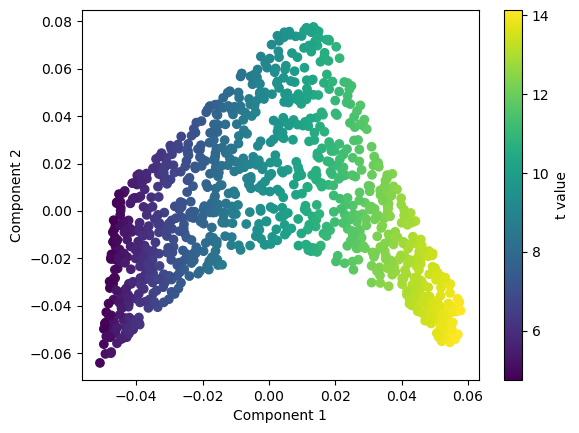

In [26]:
from sklearn.datasets import make_swiss_roll
from sklearn.manifold import LocallyLinearEmbedding

Xswiss, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)
lle = LocallyLinearEmbedding(n_components=2, n_neighbors=10, random_state=42, n_jobs=-1)
Xunrolled = lle.fit_transform(Xswiss)

# t is a 1d numpy array containing the position of each instance along the rolled axis

plt.scatter(Xunrolled[:, 0], Xunrolled[:, 1], c=t, cmap='viridis')
plt.colorbar(label='t value')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()

Distances dont get preserved on a large scale well -> this should be a rectangle

How LLE works: 
- for each $x_i$ find k nearest neighbors
- try to reconstruct x as a linear function of neighbors -> make distance btwn $x_i$ and $\sum_{j=1}^{m} w_{i,j} x^{(j)}$ as small as possible (wi is 0 if j not a neighbor)
- weight matrix $\hat{W}$ contains all the predicted weights for each point
- $\hat{Z} = \underset{Z}{\text{argmin}} \sum_{i=1}^{n} ( z_i - \sum_{j=1}^{m} \hat{w}_{i,j} z_j )^2$
- Above equation helps minimize the squared distance between z_i and z_j*weight
- Two steps are similar, but step 2 keeps weights fixed and finds best positions, and step 1 keeps positions fixed and finds best weights

This scales awfully to large datasets

## Other Techniques

In [ ]:
# Multidimensional Scaling
# Reduces dimensionality while preserving distance. Better than random proj w low-dimensional data
from sklearn.manifold import MDS

In [28]:
# Isomap
# Creates a graph that connects instances to neighbors, and reduces dimensionality while trying to preserve the number of nodes on the shortest path between two nodes
# Works good on smooth/low d manifolds with a single global structure (swiss role)
from sklearn.manifold import Isomap

In [ ]:
# TSNE - t distributed stochastic neighbor embedding
# mostly used for data viz, tries to keep similar instances together and dissimilar ones apart
from sklearn.manifold import TSNE

In [ ]:
# Linear discriminant analysis
# a linear classification algo that learns the most discriminative axes between classes
#  projecting onto these axes keeps classes as far apart as possible
# good to run before running another classification algo